# Example: the MET API

## the anatomy of an API request:
- the *root* which consists of the base URL. 
   - https://collectionapi.metmuseum.org/
- the *path* which consists of a directory structure (file structure) where the data is held: 
   - /public/collection/v1/objects
   - /public/collection/v1/departments 
   - /public/collection/v1/search
- the *query parameter* or the *endpoint* which is the specific request.
   - ?q=SearchTerm
   - ?q=cypress
   - ?q=van+gogh
  

To read more about the MET API, see here: https://metmuseum.github.io/

In [1]:
import requests

In [4]:
base_url = "https://collectionapi.metmuseum.org"
path = "/public/collection/v1/search"
query = "?q=nude"

In [6]:
nudes = requests.get(base_url + path + query)

## two functions: `type()` and `dir()`
Using `type()` and `dir()` to better understand our response data

In [7]:
# what type of object do we have?

type(nudes)

requests.models.Response

In [8]:
# what can we do with this object?
# spend some time exploring the different methods

dir(nudes)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

### individual practice: spend a couple of minutes trying out the different methods for our object

In [9]:
nudes.raw

In [10]:
nudes.elapsed

datetime.timedelta(microseconds=322409)

In [12]:
nudes.ok

True

In [13]:
# what do these numbers mean?
nudes.content

b'{"total":6915,"objectIDs":[10680,459182,486847,492828,288031,488292,483425,286352,339793,286524,492767,641369,459588,16148,489667,485409,482812,374951,342346,485408,488965,488966,488967,488968,488527,263363,11550,265430,285784,492765,481224,483235,265601,817974,817977,495273,285257,366848,485828,566713,544224,544451,552504,552505,549698,255414,254748,555566,438661,486747,552477,550680,545876,544222,544219,556558,556611,556612,556557,438427,550682,548515,438013,323163,301948,337063,282602,246312,250928,246665,267491,899010,655959,772925,288845,271440,271434,840798,781896,285254,656435,832703,550693,817649,715563,716879,718156,207024,250579,486754,817179,207494,193491,208212,835151,490587,246538,248606,285071,285092,488477,248607,247868,248793,195360,241108,248794,255387,254749,341835,341669,341469,248604,248605,255406,250472,256068,251820,787971,246300,248168,248602,243637,787972,788128,788125,788126,788127,334249,787966,787961,787960,788095,345726,244558,569274,569275,466365,471098,2

## .json() to parse our response object

In [15]:
# why do we need to add parenthesis? 
parsed = nudes.json()

In [16]:
parsed['objectIDs'][0]

10680

## passing variables into request object
create a new request with data from the original request

In [18]:
first = parsed['objectIDs'][0]

In [20]:
# changing 'search' to 'objects' and 'nudes' to variable 'first'
url = f"https://collectionapi.metmuseum.org/public/collection/v1/objects/{first}"

In [21]:
first_object = requests.get(url)

In [22]:
first_object

<Response [200]>

In [23]:
dir(first_object)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

look at the json for the first object

In [24]:
first_object.json()

{'objectID': 10680,
 'isHighlight': False,
 'accessionNumber': '55.150',
 'accessionYear': '1955',
 'isPublicDomain': False,
 'primaryImage': '',
 'primaryImageSmall': '',
 'additionalImages': [],
 'constituents': [{'constituentID': 161812,
   'role': 'Artist',
   'name': 'Arthur B. Davies',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500013464',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q708502',
   'gender': ''}],
 'department': 'The American Wing',
 'objectName': 'Sculpture',
 'title': 'Nude',
 'culture': 'American',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Arthur B. Davies',
 'artistDisplayBio': 'American, Utica, New York 1862–1928 Florence',
 'artistSuffix': '',
 'artistAlphaSort': 'Davies, Arthur B.',
 'artistNationality': 'American',
 'artistBeginDate': '1862',
 'artistEndDate': '1928',
 'artistGender': '',
 'artistWikidata_URL': 'https://www.wikidata.org

In [26]:
# now we can save this first object to its own variable. Will make it easier to do more things to it!

first_obj = first_object.json()

## accessing items from a `dict` by keys

In [28]:
type(first_obj)

dict

In [29]:
# what is a `dict`? 
# key:value pairs

filipa = {
    'name': ['filipa', 'da gama', 'calado'],
    'age': 35,
    'degree': 'literature',
    'job': 'digital scholarship specialist',
}

In [30]:
# access items through brackets containing keys

filipa['job']

'digital scholarship specialist'

In [31]:
# see the keys

filipa.keys()

dict_keys(['name', 'age', 'degree', 'job'])

In [32]:
# let's try with the first object

first_obj.keys()

dict_keys(['objectID', 'isHighlight', 'accessionNumber', 'accessionYear', 'isPublicDomain', 'primaryImage', 'primaryImageSmall', 'additionalImages', 'constituents', 'department', 'objectName', 'title', 'culture', 'period', 'dynasty', 'reign', 'portfolio', 'artistRole', 'artistPrefix', 'artistDisplayName', 'artistDisplayBio', 'artistSuffix', 'artistAlphaSort', 'artistNationality', 'artistBeginDate', 'artistEndDate', 'artistGender', 'artistWikidata_URL', 'artistULAN_URL', 'objectDate', 'objectBeginDate', 'objectEndDate', 'medium', 'dimensions', 'measurements', 'creditLine', 'geographyType', 'city', 'state', 'county', 'country', 'region', 'subregion', 'locale', 'locus', 'excavation', 'river', 'classification', 'rightsAndReproduction', 'linkResource', 'metadataDate', 'repository', 'objectURL', 'tags', 'objectWikidata_URL', 'isTimelineWork', 'GalleryNumber'])

### individual practice: take a few minutes to inspect the dataset by using different keys

In [33]:
# no result!

first_obj['artistGender']

''

In [35]:
first_obj['department']

'The American Wing'

In [34]:
first_obj['culture']

'American'

## looping through our dataset

Now let's go back to the original list, and pull out all the info for the results. 

In [36]:
parsed['objectIDs']

[10680,
 459182,
 486847,
 492828,
 288031,
 488292,
 483425,
 286352,
 339793,
 286524,
 492767,
 641369,
 459588,
 16148,
 489667,
 485409,
 482812,
 374951,
 342346,
 485408,
 488965,
 488966,
 488967,
 488968,
 488527,
 263363,
 11550,
 265430,
 285784,
 492765,
 481224,
 483235,
 265601,
 817974,
 817977,
 495273,
 285257,
 366848,
 485828,
 566713,
 544224,
 544451,
 552504,
 552505,
 549698,
 255414,
 254748,
 555566,
 438661,
 486747,
 552477,
 550680,
 545876,
 544222,
 544219,
 556558,
 556611,
 556612,
 556557,
 438427,
 550682,
 548515,
 438013,
 323163,
 301948,
 337063,
 282602,
 246312,
 250928,
 246665,
 267491,
 899010,
 655959,
 772925,
 288845,
 271440,
 271434,
 840798,
 781896,
 285254,
 656435,
 832703,
 550693,
 817649,
 715563,
 716879,
 718156,
 207024,
 250579,
 486754,
 817179,
 207494,
 193491,
 208212,
 835151,
 490587,
 246538,
 248606,
 285071,
 285092,
 488477,
 248607,
 247868,
 248793,
 195360,
 241108,
 248794,
 255387,
 254749,
 341835,
 341669,
 341

In [37]:
ids = parsed['objectIDs']

In [38]:
type(ids)

list

In [39]:
len(ids)

6915

## remember loops?

In [43]:
for item in ids[:10]:
    print(item)

10680
459182
486847
492828
288031
488292
483425
286352
339793
286524


In [59]:
first_fifty = []
for item in ids[:50]:
    # passing the objectID variable into the URL
    url = f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{item}'
    # grabbing our response for that object
    response = requests.get(url)
    # parsing our response with json
    parsed = response.json()
    # appending the response to our new list
    first_fifty.append(parsed)

In [61]:
# because we already know the first, let's check the last item

first_fifty[-1]

{'objectID': 486747,
 'isHighlight': False,
 'accessionNumber': '1996.403.17',
 'accessionYear': '1996',
 'isPublicDomain': False,
 'primaryImage': '',
 'primaryImageSmall': '',
 'additionalImages': [],
 'constituents': [{'constituentID': 164946,
   'role': 'Artist',
   'name': 'Henry Moore',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500032596',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q151097',
   'gender': ''}],
 'department': 'Modern and Contemporary Art',
 'objectName': 'Sculpture',
 'title': 'Reclining Nude',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Henry Moore',
 'artistDisplayBio': 'British, Castleford 1898–1986 Much Hadham',
 'artistSuffix': '',
 'artistAlphaSort': 'Moore, Henry',
 'artistNationality': 'British',
 'artistBeginDate': '1898',
 'artistEndDate': '1986',
 'artistGender': '',
 'artistWikidata_URL': 'https://www.wikidata.org/

now guess what type of data we have for `first_fifty`?

In [62]:
type(first_fifty)

list

let's look at some of the values

In [63]:
# what does this error mean?

for item in first_fifty:
    print(item['title'])

Nude
Nude in Front of a Mantel
Reclining Nude
Standing Nude (Girl)
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude


KeyError: 'title'

## looping with conditions

In [66]:
titles

['Nude',
 'Nude in Front of a Mantel',
 'Reclining Nude',
 'Standing Nude (Girl)',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Statuette of a nude woman with moveable arms, one missing',
 'Female figure',
 'Statuette of the Child Amenemhab',
 'Female figure holding infant',
 'Female figure',
 'Nude female holding monkeys',
 'Bronze statuette of a nude youth',
 'Terracotta statuette of a nude woman',
 'Nude female figure holding a vase on her head',
 'Study of a Female Nude',
 'Reclining Nude',
 'Nude',
 'Nude in Front of a Mantel',
 'Reclining Nude',
 'Standing Nude (Girl)',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 'Nude',
 

In [73]:
for item in first_fifty:
    title = item.get('artistDisplayName')
    print(title)

Arthur B. Davies
Balthus (Balthasar Klossowski)
Amedeo Modigliani
Henri Matisse
Brassaï
Leon Kroll
Egon Schiele
Bill Brandt
Suzanne Valadon
Félix-Jacques-Antoine Moulin
Reg Butler
Childe Hassam
Stuart Martin Kaufman
William McGregor Paxton
Robert Ranieri
Dorothy Heller
Dorothy Grotz
Victoria Hutson Huntley
Milton Avery
Dorothy Heller
Gaston Lachaise
Gaston Lachaise
Gaston Lachaise
Gaston Lachaise
Henri Matisse
Charles W. Gilhousen
Grace Hamilton McIntyre
Konrad Cramer
Edward Weston
Pierre Bonnard
Eugene Speicher
André Derain
Roger Parry
None
None
Henri Matisse
Bill Brandt
Pablo Picasso
Auguste Herbin









Henri Lehmann
Henry Moore


In [69]:
# combine get() with conditional to get rid of the None's

for item in first_fifty:
    if item.get('artistDisplayName'):
        print(item['artistDisplayName'])

Arthur B. Davies
Balthus (Balthasar Klossowski)
Amedeo Modigliani
Henri Matisse
Brassaï
Leon Kroll
Egon Schiele
Bill Brandt
Suzanne Valadon
Félix-Jacques-Antoine Moulin
Reg Butler
Childe Hassam
Stuart Martin Kaufman
William McGregor Paxton
Robert Ranieri
Dorothy Heller
Dorothy Grotz
Victoria Hutson Huntley
Milton Avery
Dorothy Heller
Gaston Lachaise
Gaston Lachaise
Gaston Lachaise
Gaston Lachaise
Henri Matisse
Charles W. Gilhousen
Grace Hamilton McIntyre
Konrad Cramer
Edward Weston
Pierre Bonnard
Eugene Speicher
André Derain
Roger Parry
Henri Matisse
Bill Brandt
Pablo Picasso
Auguste Herbin
Henri Lehmann
Henry Moore


In [71]:
# why do you think we see only female?

for item in first_fifty:
    if item.get('artistGender'):
        print(item['artistGender'])

Female
Female
Female
Female
Female


In [79]:
# use try statement to pass over any empty sets

for i in first_fifty:
    try:
        print(i['title'])
    except KeyError:
        continue

Nude
Nude in Front of a Mantel
Reclining Nude
Standing Nude (Girl)
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Nude
Statuette of a nude woman with moveable arms, one missing
Female figure
Statuette of the Child Amenemhab
Female figure holding infant
Female figure
Nude female holding monkeys
Bronze statuette of a nude youth
Terracotta statuette of a nude woman
Nude female figure holding a vase on her head
Study of a Female Nude
Reclining Nude


In [77]:
titles = []
for item in first_fifty:
    try:
        titles.append(item['title'])
    except KeyError:
        continue

## sorting our data

In [78]:
# look again at the first object
first_fifty[0]

{'objectID': 10680,
 'isHighlight': False,
 'accessionNumber': '55.150',
 'accessionYear': '1955',
 'isPublicDomain': False,
 'primaryImage': '',
 'primaryImageSmall': '',
 'additionalImages': [],
 'constituents': [{'constituentID': 161812,
   'role': 'Artist',
   'name': 'Arthur B. Davies',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500013464',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q708502',
   'gender': ''}],
 'department': 'The American Wing',
 'objectName': 'Sculpture',
 'title': 'Nude',
 'culture': 'American',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Arthur B. Davies',
 'artistDisplayBio': 'American, Utica, New York 1862–1928 Florence',
 'artistSuffix': '',
 'artistAlphaSort': 'Davies, Arthur B.',
 'artistNationality': 'American',
 'artistBeginDate': '1862',
 'artistEndDate': '1928',
 'artistGender': '',
 'artistWikidata_URL': 'https://www.wikidata.org

In [82]:
# this syntax allows us to see only the positive values

for item in first_fifty:
    if item.get('artistGender'):
        print(item['artistGender'])

Female
Female
Female
Female
Female


In [86]:
# but by saving the variable, we can also get none values

for item in first_fifty:
    gender = item.get('artistGender')
    print(gender)









Female






Female
Female
Female

Female













None
None

















In [105]:
# let's get a bunch of this data into lists

titles = []
names = []
genders = []
depts = []
countries = []
urls = []

for item in first_fifty:
    title = item.get('artistGender')
    titles.append(title)
    name = item.get('artistDisplayName')
    names.append(name)
    gender = item.get('artistGender')
    genders.append(gender)
    dept = item.get('department')
    depts.append(dept)
    country = item.get('country')
    countries.append(country)
    url = item.get('objectURL')
    urls.append(url)

In [106]:
countries[:10]

['', '', '', '', '', '', '', '', '', '']

In [107]:
depts[:10]

['The American Wing',
 'Robert Lehman Collection',
 'Modern and Contemporary Art',
 'Modern and Contemporary Art',
 'Photographs',
 'Modern and Contemporary Art',
 'Modern and Contemporary Art',
 'Photographs',
 'Drawings and Prints',
 'Photographs']

In [108]:
urls[:10]

['https://www.metmuseum.org/art/collection/search/10680',
 'https://www.metmuseum.org/art/collection/search/459182',
 'https://www.metmuseum.org/art/collection/search/486847',
 'https://www.metmuseum.org/art/collection/search/492828',
 'https://www.metmuseum.org/art/collection/search/288031',
 'https://www.metmuseum.org/art/collection/search/488292',
 'https://www.metmuseum.org/art/collection/search/483425',
 'https://www.metmuseum.org/art/collection/search/286352',
 'https://www.metmuseum.org/art/collection/search/339793',
 'https://www.metmuseum.org/art/collection/search/286524']

## data anlaysis with pandas

In [109]:
import pandas as pd

In [110]:
df = pd.DataFrame({
    'title': titles,
    'name': names,
    'gender': genders,
    'department': depts,
    'country': countries,
    'link': urls
})

In [111]:
df

,title,name,gender,department,country,link
0,,Arthur B. Davies,,The American Wing,,https://www.metmuseum.org/art/collection/searc...
1,,Balthus (Balthasar Klossowski),,Robert Lehman Collection,,https://www.metmuseum.org/art/collection/searc...
2,,Amedeo Modigliani,,Modern and Contemporary Art,,https://www.metmuseum.org/art/collection/searc...
3,,Henri Matisse,,Modern and Contemporary Art,,https://www.metmuseum.org/art/collection/searc...
4,,Brassaï,,Photographs,,https://www.metmuseum.org/art/collection/searc...
5,,Leon Kroll,,Modern and Contemporary Art,,https://www.metmuseum.org/art/collection/searc...
6,,Egon Schiele,,Modern and Contemporary Art,,https://www.metmuseum.org/art/collection/searc...
7,,Bill Brandt,,Photographs,,https://www.metmuseum.org/art/collection/searc...
8,Female,Suzanne Valadon,Female,Drawings and Prints,,https://www.metmuseum.org/art/collection/searc...
9,,Félix-Jacques-Antoine Moulin,,Photographs,,https://www.metmuseum.org/art/collection/searc...


In [115]:
df.value_counts('department')

department
Modern and Contemporary Art    20
Photographs                     8
Egyptian Art                    7
Drawings and Prints             5
The American Wing               3
Greek and Roman Art             2
Robert Lehman Collection        2
European Paintings              1
dtype: int64

<Axes: >

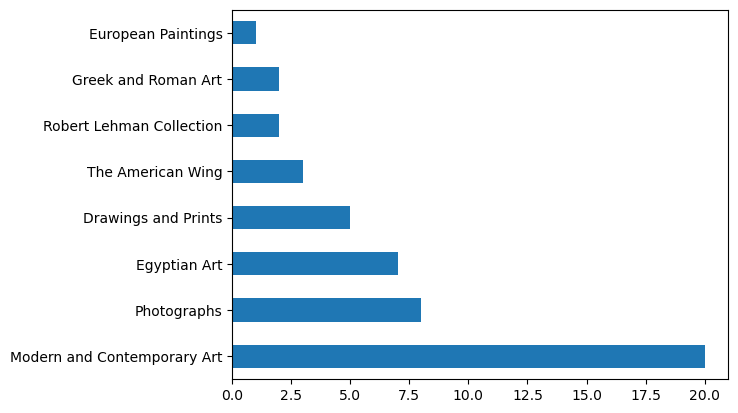

In [116]:
df.department.value_counts()[:20].plot(kind = 'barh')

<Axes: ylabel='department'>

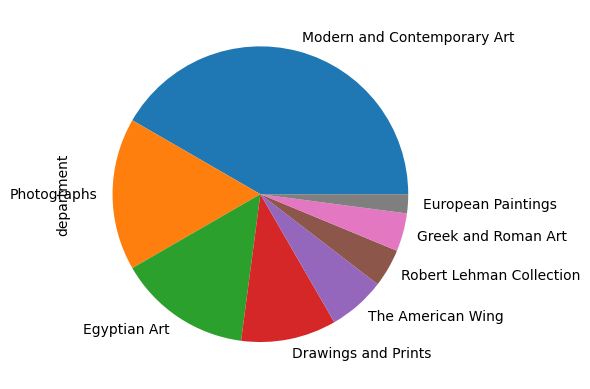

In [118]:
df.department.value_counts()[:10].plot(kind = 'pie')